# Business Understanding

Een gameontwikkelaar heeft ons gevraagd om te kijken wat de beste eigenschappen van een game zijn, om zo zelf een succesvolle game te kunnen maken voor de app store. Om dit makkelijker te kunnen onderzoeken, hebben we de hoofdvraag in meerdere deelvragen opgesplitst.

#### Hoofdvraag:
"Wat zijn de meest belangrijke kenmerken van games met hoge ratings?"

#### Deelvragen:
##### "Is er een trend in het releasejaar en gemiddelde prijs van games?"

Hiermee krijgen we duidelijk wat de trend is en wat dan de meest voorkomende prijs is. Deze prijs is dan ook meteen aan te raden, omdat het dan veel voorkomt dus door spelers prima te betalen is. 

##### "Wat is het aantal games per jaar gereleased?"

Hiermee krijgt de ontwikkelaar goed te zien hoe veel druk er is en of het makkelijk is om op te vallen, zonder diep in te gaan op data.

##### "Zit er een relatie tussen het aantal ratings en de lifetime van een game (release  tot laatste update)"

Hiermee krijgen we duidelijk of een game aan het begin al populair is, of dat een game eerst tijd nodig heeft om veel ratings te krijgen

##### "Zit er een relatie tussen de extra genres en in-app aankopen?"

Hiermee krijgen we duidelijk welke extra genres de ontwikkelaar moet opnemen in zijn game, om zo in-app aankopen in de game te doen zonder dat dit negatief opvalt in de genre

##### "Maakt grootte uit voor de ratings van de game?"

Het doel van deze vraag is om erachter te komen of een 'grote' applicatie als beter wordt beoordeeld t.o.v.  een 'kleine' applicatie. De app-rating heeft grote invloed op hoe regelmatig een app wordt aanbevolen. We zijn dus benieuwd of we kunnen concluderen dat 'grote' applicaties, als beter beoordeeld er uit komen, of dat juist  de 'kleine' applicaties als beter worden beoordeeld.

##### "Maakt het aantal games gereleased door de developer uit voor de ratings? Wat voor effect heeft het?"

Hiermee krijgen we duidelijk of er meer games moeten worden gemaakt, of dat de ontwikkelaar zich kan focussen op 1 game zonder hier negatieve gevolgen van te merken.

##### "Welke taal krijgt de hoogste reviews?"

Met het beantwoorden van deze vraag krijgen we duidelijk op welke taal moet worden gefocust, en dus de taal is waar de ontwikkelaar zich eerst op moet focussen.

##### "Wat hebben de apps zonder rating gemeen?"

Met het beantwoorden van deze vraag kunnen we erachter komen wat er bijdraagt aan een app
zonder ratings. Als er een app er er worden geen ratings gegeven door de gebruikers wordt de app
ook niet snel aageraden en snel als onsuccesvol beschouwd. Dit willen we voorkomen door te analyseren
wat de factoren zijn bij onsuccesvolle apps zonder rating.

# Data Understanding

* de dataset die er wordt toegeleverd is een bestand in csv formaat.
* de databron is makkelijk te benaderen vanuit python met behulp van pandas
* de databse bevat 17007 rijen en 18 kolommen
* de volgende kollommen staan in de database
    * `URL`: de url naar de game in de appstore
    * `ID`: unieke id voor de game
    * `name`: naam van de app
    * `subtitle`: alternative naam voor de app
    * `icon url`: url naar de icon van de app
    * `Avegage user rating`: de gemiddelde score van de app op de appstore
    * `Uer rating count`: het aantal ratings dat de app heeft
    * `price`: de aankoop prijs van de app
    * `In-app Purchases`: lijst met prijzen van in-app aankopen
    * `Description`: een omschrijving van de app
    * `Developper`: de uitgever van de app
    * `Age rating`: de aanbevolen minimumleeftijd (4+, 12+ ect.)
    * `Languages`: talen waarin de app beschikbaar is
    * `Size`: de groote van de app in bytes
    * `primary` Genre: de genre van de app (entertainment, strategie, ect.)
    * `Genres`: een lijst met overige genres waar binnen de app valt
    * `Original` realease date: de datum waarop de app werd uitgegeven
    * `current version release date`: de datum van de laatste update

#### Imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib

%config IPCompleter.greedy = True  
%matplotlib inline

In [77]:
game_data = pd.read_csv("appstore_games.csv")

#### Bovenste rijen:

In [78]:
game_data.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

#### Grootte

In [79]:
print("Aantal Rijen: " + str(game_data.shape[0]))

Aantal Rijen: 17007


#### Kolommen

In [80]:
game_data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

#### Types

In [81]:
game_data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

#### Lege velden?

In [82]:
game_data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

#### Eigenschappen?

In [83]:
game_data.describe().transpose()

count          mean           std          min  \
ID                   17007.0  1.059614e+09  2.999676e+08  284921427.0   
Average User Rating   7561.0  4.060905e+00  7.514275e-01          1.0   
User Rating Count     7561.0  3.306531e+03  4.232256e+04          5.0   
Price                16983.0  8.134187e-01  7.835732e+00          0.0   
Size                 17006.0  1.157064e+08  2.036477e+08      51328.0   

                             25%           50%           75%           max  
ID                   899654330.0  1.112286e+09  1.286983e+09  1.475077e+09  
Average User Rating          3.5  4.500000e+00  4.500000e+00  5.000000e+00  
User Rating Count           12.0  4.600000e+01  3.090000e+02  3.032734e+06  
Price                        0.0  0.000000e+00  0.000000e+00  1.799900e+02  
Size                  22950144.0  5.676895e+07  1.330271e+08  4.005591e+09

#### Genres?

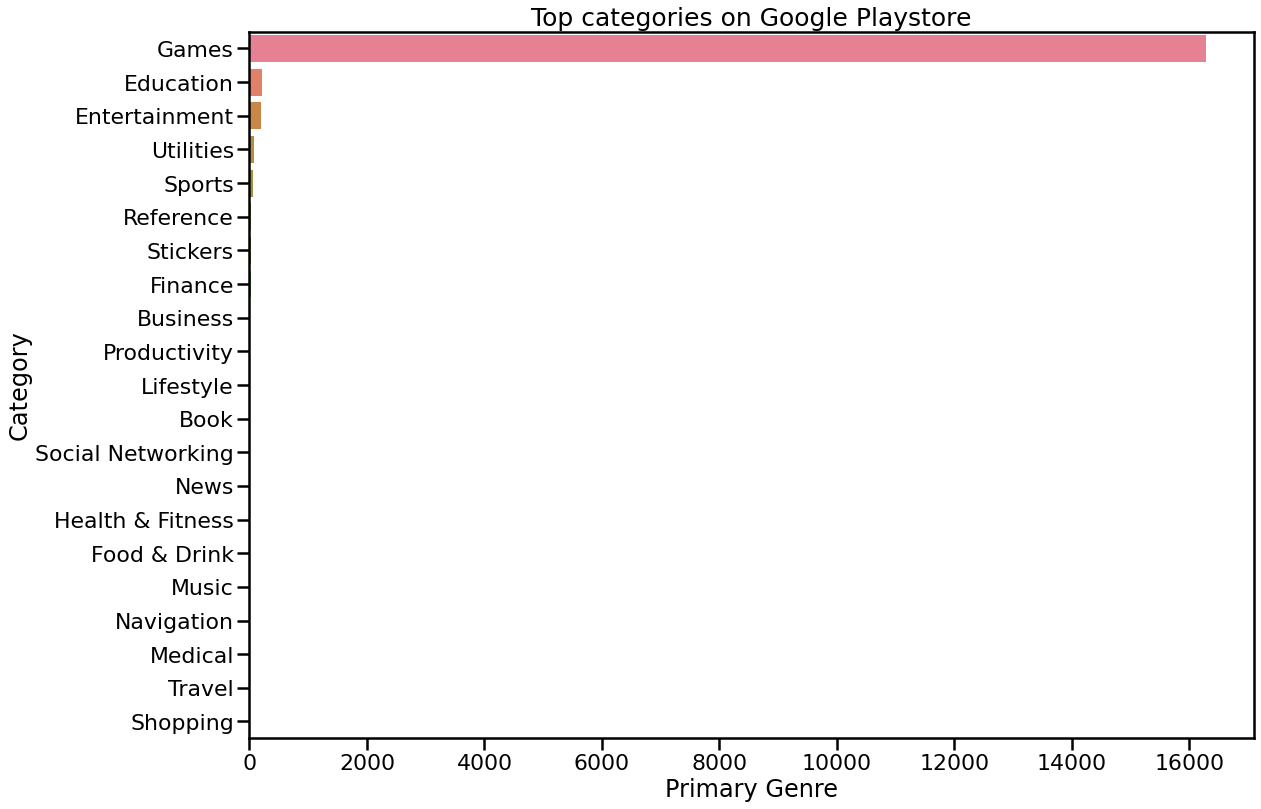

In [84]:
y = game_data['Primary Genre'].value_counts().index
x = game_data['Primary Genre'].value_counts()

plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = x, y = y, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

In [85]:
game_data["Genres"].value_counts()

Games, Strategy, Puzzle                          778
Games, Puzzle, Strategy                          694
Games, Strategy                                  588
Games, Strategy, Action                          483
Games, Simulation, Strategy                      465
                                                ... 
Games, Action, Strategy, Utilities                 1
Games, Travel, Strategy, Word                      1
Games, Finance, Strategy, Puzzle                   1
Games, Simulation, Health & Fitness, Strategy      1
Sports, Racing, Games, Strategy                    1
Name: Genres, Length: 1004, dtype: int64

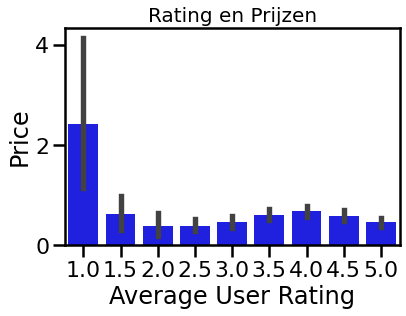

In [86]:
graph = sns.barplot(data=game_data,x='Average User Rating', y='Price', color="Blue")
plt.title('Rating en Prijzen',size = 20);

<AxesSubplot:xlabel='Average User Rating', ylabel='Count'>

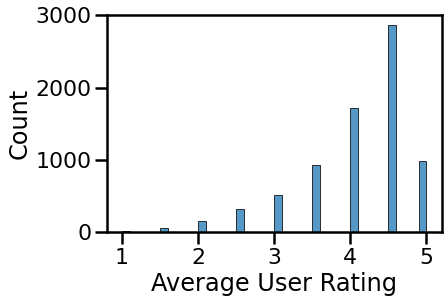

In [87]:
sns.histplot(data=game_data[game_data["Average User Rating"]>0], x='Average User Rating')

# Data Preparation

#### Lege velden invullen of weghalen

In [88]:
game_data["Price"] = game_data["Price"].fillna(0)
game_data["Subtitle"] = game_data["Subtitle"].fillna('')
game_data["Average User Rating"] = game_data["Average User Rating"].fillna(0)
game_data["User Rating Count"] = game_data["User Rating Count"].fillna(0)
game_data["Size"] = game_data["Size"].fillna(0)
game_data["In-app Purchases"] = game_data["In-app Purchases"].fillna('')
game_data["Languages"] = game_data["Languages"].fillna('')

#### Veld types goed maken en toevoegen

In [89]:
# Types goed maken
game_data["Original Release Date"] = pd.to_datetime(game_data["Original Release Date"])
game_data["Current Version Release Date"] = pd.to_datetime(game_data["Current Version Release Date"])
game_data["Age Rating"] = game_data["Age Rating"].astype("category")

#### Feature Engineering

Omdat er veel data is wat niet te plotten is, gaan we meer data halen uit hetgeen wat we hebben. Dit is feature engineering.

In [105]:
# Toevoegen van Features

# Release year
game_data["Release Year"] = game_data["Original Release Date"].dt.year

# Lifetime van de game (release tot laatste update)
game_data["Lifetime"] = game_data["Current Version Release Date"] - game_data["Original Release Date"]
# Kan soms de release na de laatste update, daarom de absolute waarde
game_data["Lifetime"] = game_data["Lifetime"].agg(abs)

# Lengte van de beschrijving
game_data["Description Length"] = game_data["Description"].agg(len)

# Aantal talen
game_data["Amount of Languages"] = game_data["Languages"].str.count(' ') + 1

# Lifetime van de game in jaren
game_data["Lifetime In Years"] = (game_data["Lifetime"].dt.days / 365).agg(round)

# Lifetime van de developer
per_dev = game_data["Developer"].value_counts().to_dict()

# Aantal games per developer
game_data["Amount of Games per Developer"] = game_data["Developer"].map(per_dev)

# Aantal genres van de game
game_data['Aantal Genres'] = game_data['Genres'].str.count(' ') + 1

# Aantal mogelijke in-app aankopen
game_data['Aantal In-app'] = game_data['In-app Purchases'].str.count(',')+1

# Grootte in mb
game_data['SizeInMb'] = game_data['Size'] / 1024 / 1024
game_data['SizeInMb'] = game_data['SizeInMb'].round(1)

In [91]:
def GetTimeOfDeveloper(column, first):
    groupedperdev = game_data.sort_values(column).set_index("Developer").groupby("Developer")[column]
    startofdev = groupedperdev.unique().map(lambda x : x[first]).to_dict()
    return game_data["Developer"].map(startofdev)

game_data["StartOfDev"] = GetTimeOfDeveloper("Original Release Date", 0)
game_data["EndOfDev"] = GetTimeOfDeveloper("Current Version Release Date", -1)
game_data["DeveloperLifetime"] = game_data["EndOfDev"] - game_data["StartOfDev"]
game_data["DeveloperLifetime"] = pd.Series([x.days for x in game_data["DeveloperLifetime"]]).agg(abs)

In [94]:
hasrating = game_data["User Rating Count"]>0
game_data["HasRating"] = hasrating.astype("int")

#### Data normalizeren

In [95]:
normalizedData = game_data.copy()
normalizedData = normalizedData[["Average User Rating","User Rating Count","Price","Size"
                                 ,"Release Year","Description Length","Amount of Languages"
                                 ,"Lifetime In Years","Amount of Games per Developer","DeveloperLifetime","HasRating"]]
normalizedData = (normalizedData - normalizedData.min()) / (normalizedData.max() - normalizedData.min())

#### Pairplot voor relaties weergeven

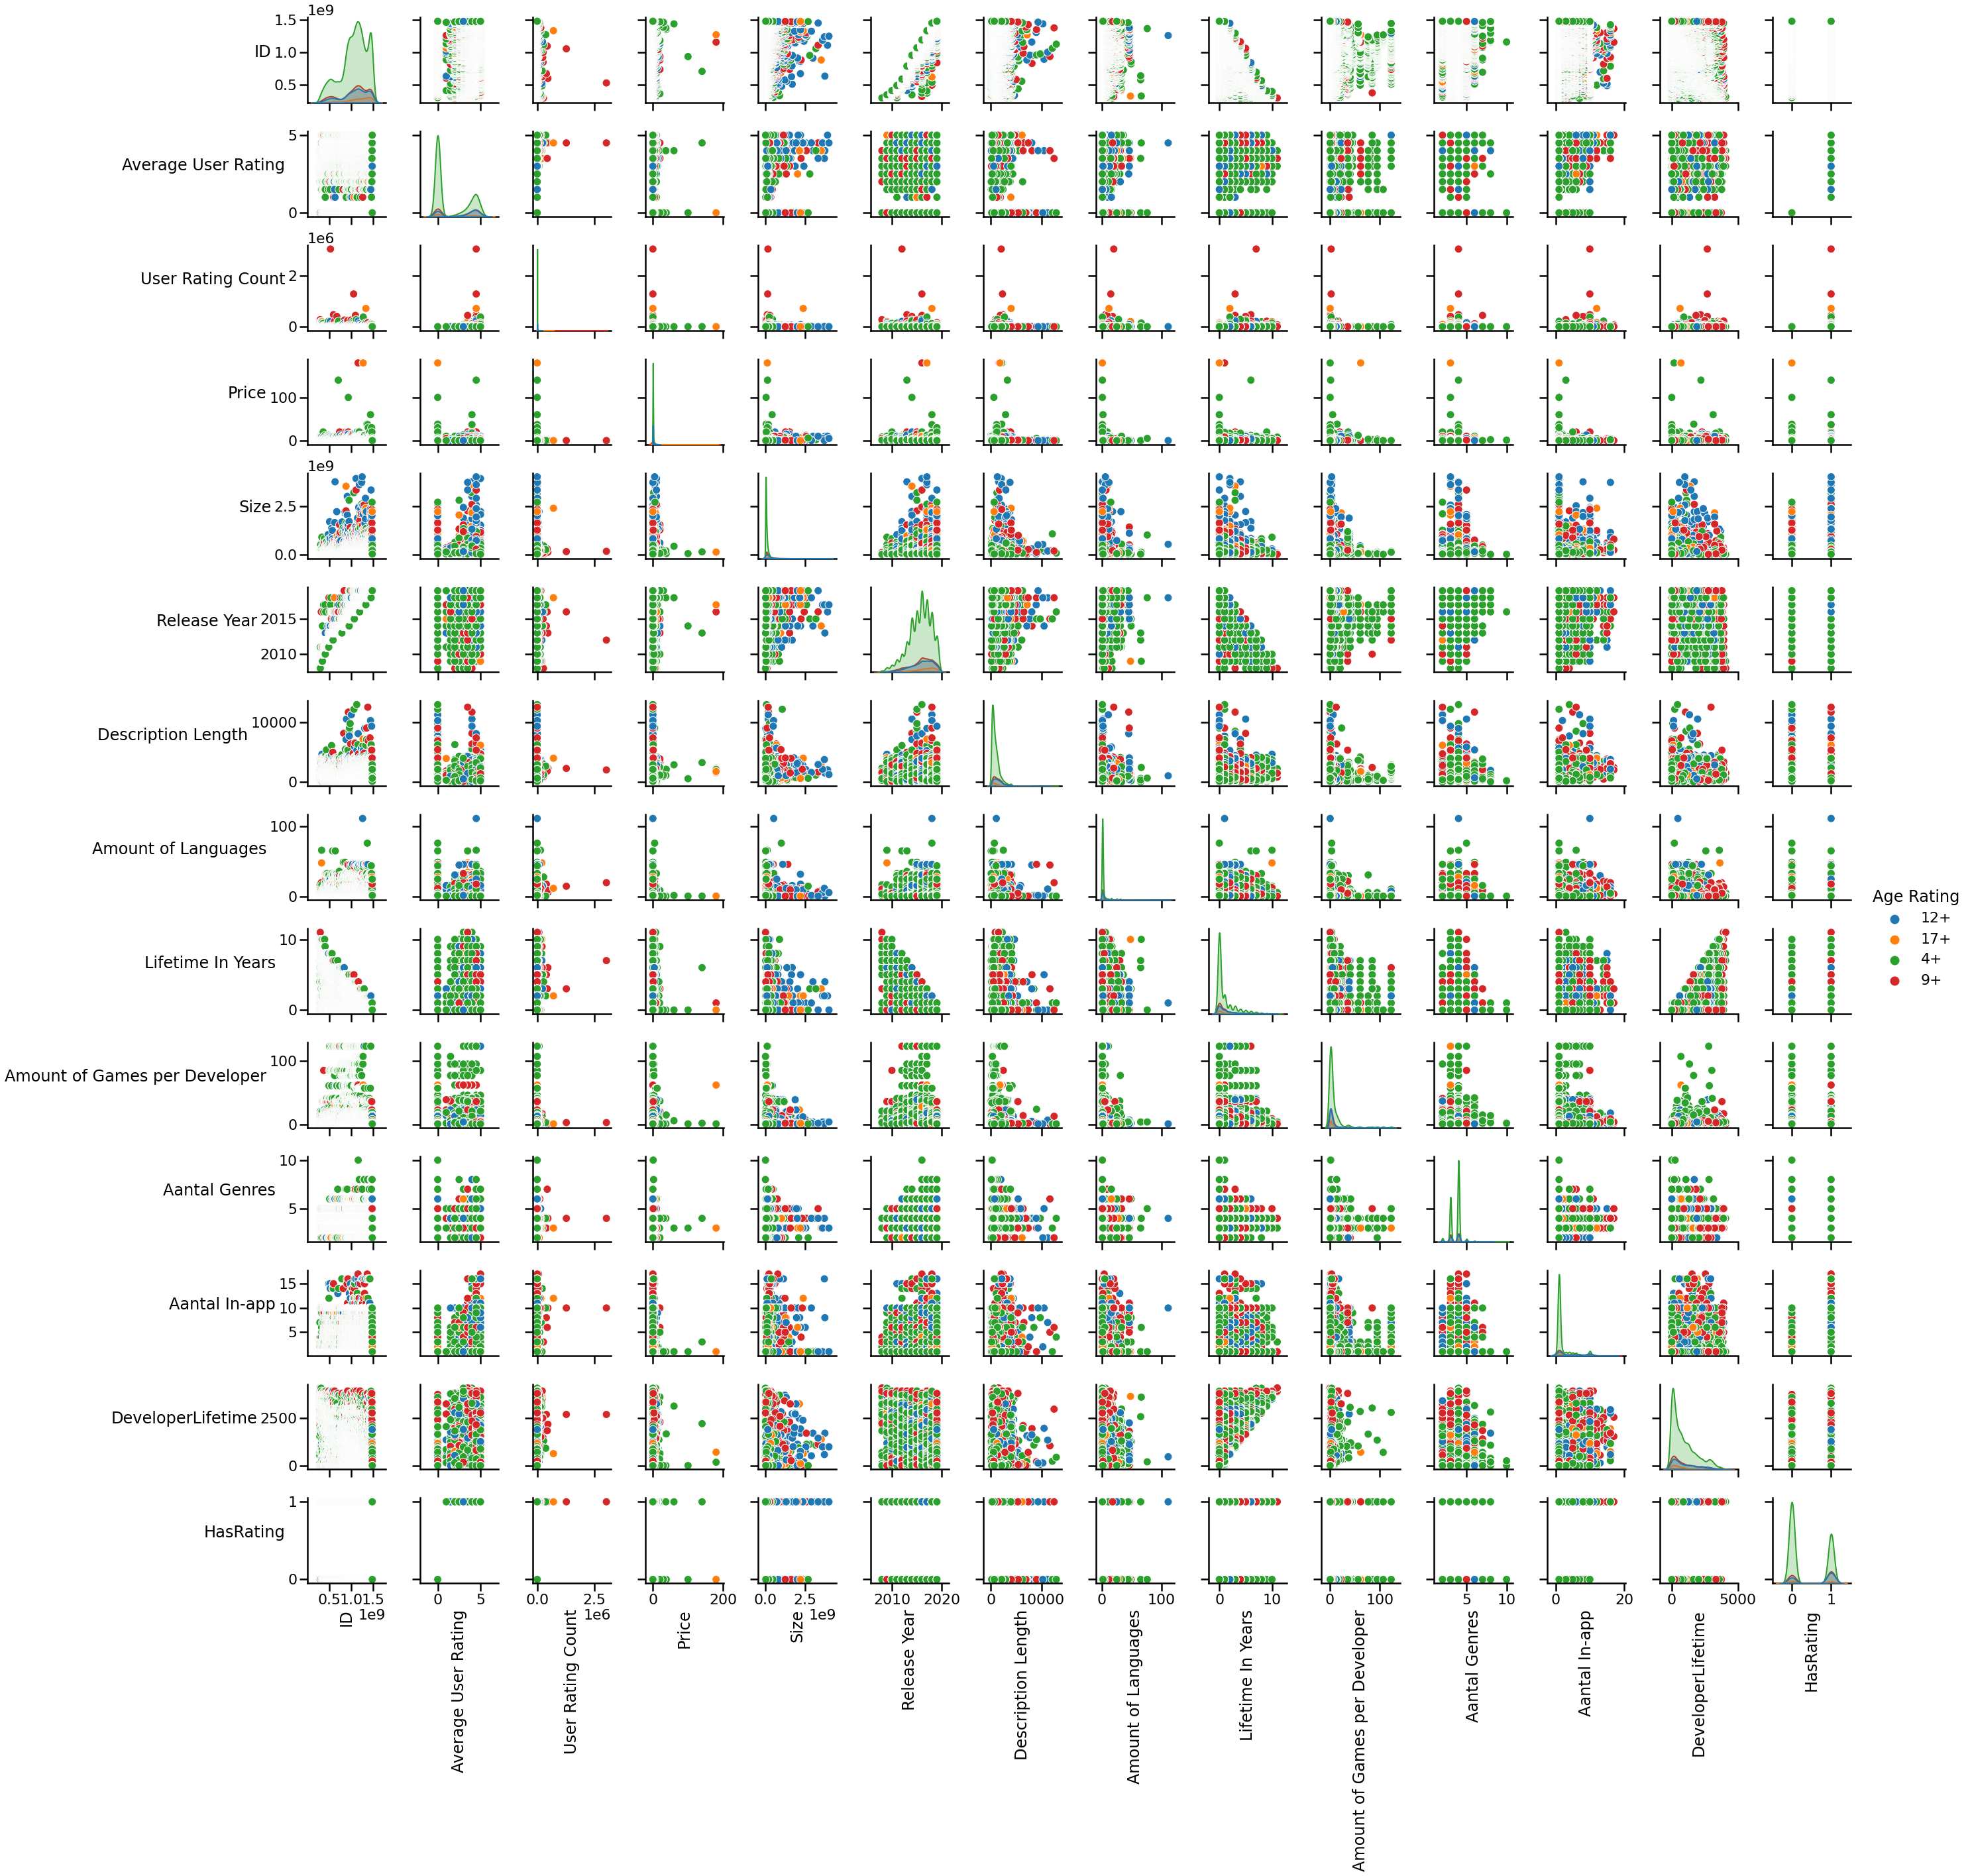

In [96]:
sns.set_context("poster")
g = sns.pairplot(game_data, hue="Age Rating")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    ax.yaxis.get_label().set_horizontalalignment('right')

<AxesSubplot:>

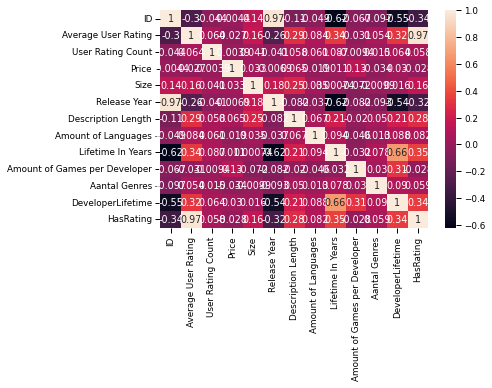

In [64]:
sns.set_context("paper")
sns.heatmap(game_data.corr(), annot = True)

<AxesSubplot:xlabel='Age Rating', ylabel='Average User Rating'>

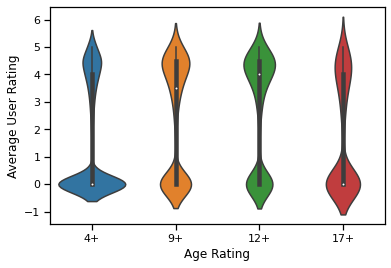

In [65]:
sns.set_context("notebook")
sns.violinplot(x="Age Rating",y="Average User Rating",data=game_data, order=["4+","9+","12+","17+"])

In [122]:
#Kijken of er relaties zijn die we verder kunnen onderzoeken
df_model = normalizedData.copy()

In [123]:
n_clusters_to_test = range(2, 15)
inertias = []

for n in n_clusters_to_test:
    model = KMeans(n_clusters=n).fit(df_model[["Release Year","DeveloperLifetime"]])
    inertias.append(model.inertia_)

In [124]:
sns.lineplot(x=n_clusters_to_test, y=inertias)

<AxesSubplot:>

In [125]:
model = KMeans(n_clusters=4).fit(df_model[["Release Year","DeveloperLifetime"]])

df_model['cluster'] = model.labels_
df_model['cluster'] = df_model['cluster'].astype('category')
sns.pairplot(df_model, hue='cluster')

# Modeling

# Deelvraag : Is er een trend in het releasejaar en gemiddelde prijs van games?

#### Groeperen en gemiddelde berekenen

[Text(0.5, 0, 'Release Year'), Text(0, 0.5, 'Average Price')]

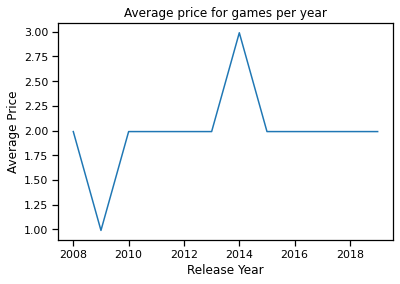

In [37]:
sns.set_context("notebook")
grouped = game_data[game_data["Price"] > 0].set_index("Release Year").sort_index().reset_index().groupby("Release Year")

peryear = pd.DataFrame(grouped["Price"].median())

ax = sns.lineplot(data = peryear, x = "Release Year", y = "Price")
ax.set(title='Average price for games per year')
ax.set(xlabel="Release Year", ylabel = "Average Price")

In [24]:
len(game_data[game_data["Price"] == 0])

14236

#### Conclusie

Er is geen trend in de prijs per jaar, deze blijft redelijk gelijk op de 2 euro zitten. Het grootste deel van de games zijn gratis, dus is dit ook aan te raden. 

# Deelvraag : Zit er een relatie tussen het aantal ratings en de lifetime van een game

In [44]:
sns.set_context("notebook")
groupedlifetime = game_data[game_data["Average User Rating"] > 0].set_index("Release Year").sort_index().reset_index().groupby("Release Year")
pertime = pd.DataFrame(groupedlifetime["Average User Rating"].mean())
ax = sns.lineplot(data = pertime, x = "Release Year", y = "Average User Rating")
ax.set(title='Average Rating per year of lifetime')
ax.set_yticks(np.arange(0,5.1,0.5).tolist())
ax.set(xlabel="Release Year", ylabel = "Average Review Rating")


[Text(0.5, 0, 'release_year'), Text(0, 0.5, 'Average Review Rating')]

#### Antwoord

Games die later worden gemaakt hebben een hogere rating. Hoe dit komt, kunnen we niet concluderen. Dit komt omdat we de data niet hebben die hiervoor nodig is. We kunnen op dit moment bijvoorbeeld niet kijken of in de game veel advertenties komen of de gameplay van hoge kwaliteit is. Het is wel aan te raden om veel voorkomende gameplay elementen over te nemen van populaire games.

# Deelvraag : Zit er een relatie tussen de extra genres en in-app aankopen?

In [100]:
sns.set_context("paper")

sns.barplot(data = game_data , x="Average User Rating", y="Aantal In-app")

<AxesSubplot:xlabel='Average User Rating', ylabel='Aantal In-app'>

In [101]:
sns.barplot(data=game_data, x = "Average User Rating", y="Aantal In-app", hue = 'Aantal In-app').legend(loc='center left', bbox_to_anchor=(1, 0.5))


Op de vraag : Heeft de in app aankopen iets te maken met de ratings? 
Zoals in het plot hierboven is te zien als er meerdere in app aankopen gedaan kunnen worden dan gaat de rating er ook mee omhoog.
Maar in de heatmap hieronder staat er maar dat de computer een correlatie van 0.41 vind.
Dus volgens de heatmap hoor het niet echt gecorreleerd te zijn maar in de barplot hierboven zie je toch wel een overkomst in hoe meer in app aankopen en de rating.

In [103]:
sns.heatmap(game_data[["Average User Rating","Aantal In-app"]].corr(), annot=True)

<AxesSubplot:>

Op de vraag : Relatie tussen genres en in-app aankopen ? Heb ik niks nuttigs kunnen vinden.
Veel dingen geprobeerd om bij een logische plot te komen alleen er kwam niks nuttigs uit.

# Deelvraag : Maakt grootte uit voor de ratings van de game?

<AxesSubplot:>

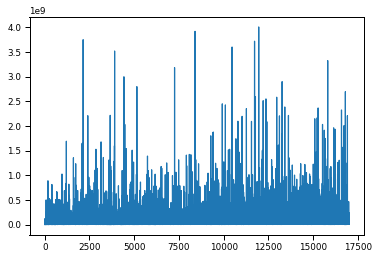

In [106]:
game_data["Size"].plot()

In [107]:
game_data['Average User Rating'].value_counts().sort_index(ascending=False)

5.0     990
4.5    2861
4.0    1722
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
0.0    9446
Name: Average User Rating, dtype: int64

**De plots wijzen uit dat er veel apps zijn met een hogere rating**

<AxesSubplot:>

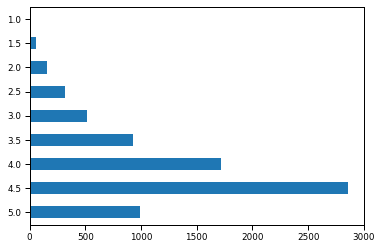

In [111]:
game_data['Average User Rating'][game_data['Average User Rating'] > 0].value_counts().sort_index(ascending=False).plot(kind = 'barh')

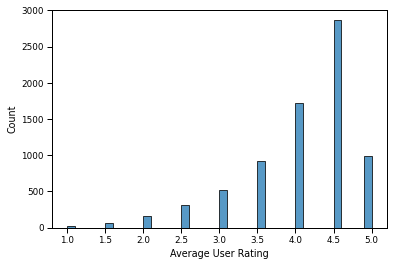

In [113]:
sns.histplot(data=game_data[game_data['Average User Rating'] > 0],
             x= 'Average User Rating')
plt.show()

**Echter is het moeilijk om te zeggen of dat iets te maken heeft met de gamesize**

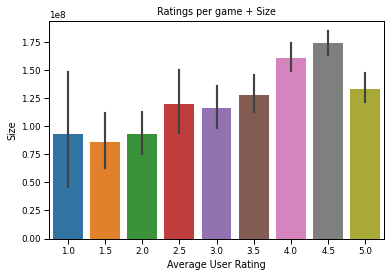

In [115]:
sns.barplot(x="Average User Rating", 
                y="Size",
                data = game_data[game_data['Average User Rating'] > 0])
plt.title('Ratings per game + Size')
plt.show()

# Deelvraag : Wat hebben de apps zonder rating gemeen?

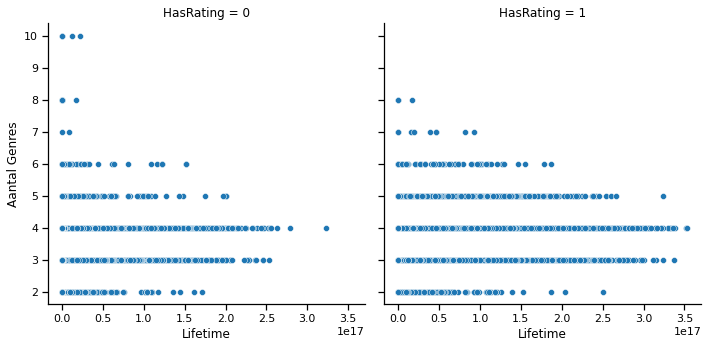

In [68]:
sns.relplot(data=game_data, col='HasRating', x='Lifetime', y='Aantal Genres', alpha=1)

<AxesSubplot:xlabel='Amount of Games per Developer', ylabel='User Rating Count'>

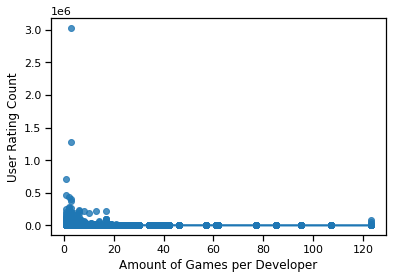

In [70]:
sns.regplot(data=game_data, x='Amount of Games per Developer', y='User Rating Count')

In [73]:
plt.figure(figsize=(10,10))
labels = game_data['HasRating'].value_counts(sort = True).index
sizes = game_data['HasRating'].value_counts(sort = True)
colors = ["red","lightgreen"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('aantal apps met rating (True)',size = 20)
plt.show()

# k means klusteren
kijken of er patronen te herkennen zijn tussen de apps

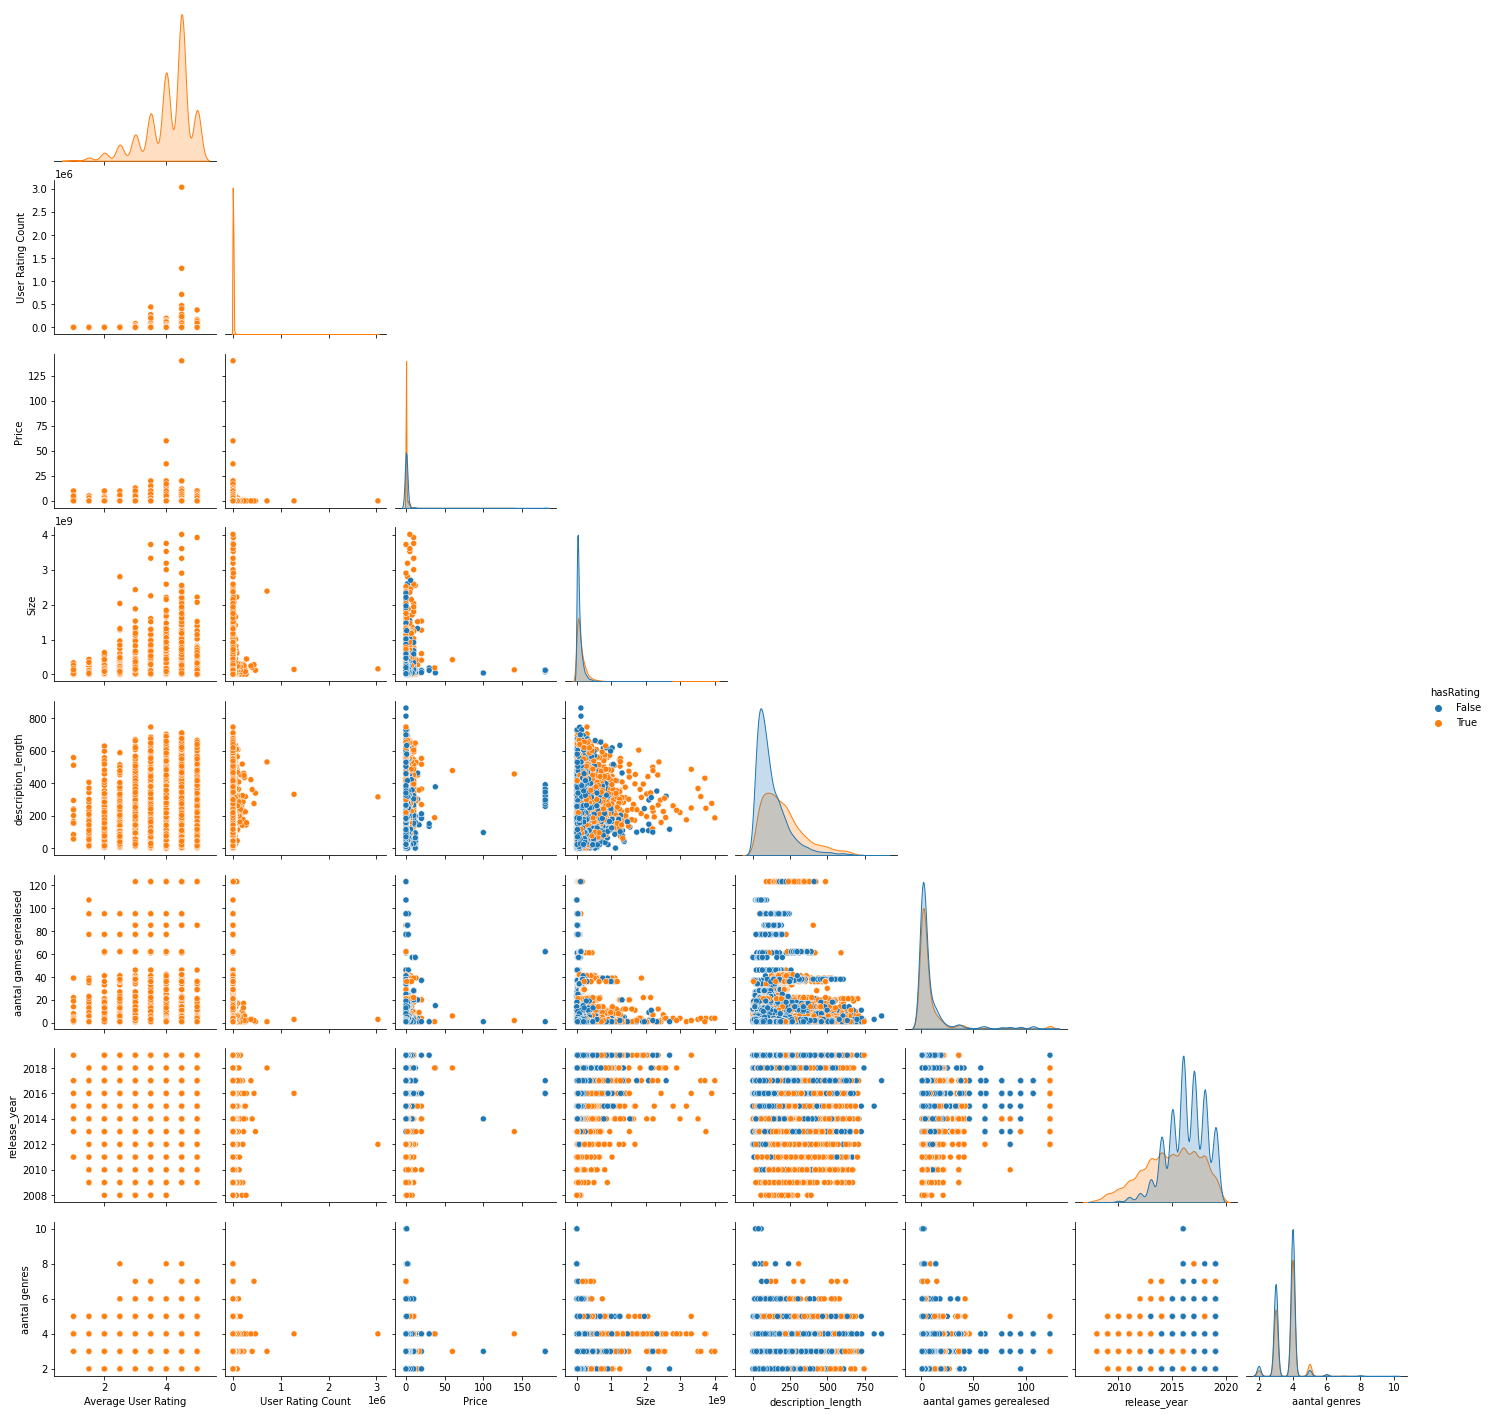

In [26]:
sns.pairplot(data=data, kind='scatter', hue='hasRating', corner=True)

**elbow plot maken om aantal cluster te bepalen**

<AxesSubplot:>

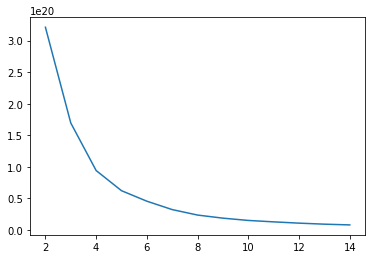

In [72]:
n_clusters_to_test = range(2, 15)
inertias = []
columnsToPick = [ 'Price', 'Size', 'description_length', 'aantal games gerealesed', 'aantal genres', 'aantal games gerealesed']

for n in n_clusters_to_test:
    model = KMeans(n_clusters=n).fit(data[columnsToPick])
    inertias.append(model.inertia_)

sns.lineplot(x=n_clusters_to_test, y=inertias)

In [29]:
Model = KMeans(n_clusters=5)
fitModel = Model.fit(data[columnsToPick])
fitModel.labels_

array([0, 0, 0, ..., 0, 3, 0])

In [73]:
dataMetClusters = data.copy()

In [74]:
dataMetClusters['cluster'] = fitModel.labels_
dataMetClusters['cluster'] = dataMetClusters['cluster'].astype('category')
dataMetClusters.dtypes

URL                                      object
Name                                     object
Subtitle                                 object
Icon URL                                 object
Average User Rating                     float64
User Rating Count                       float64
Price                                   float64
In-app Purchases                         object
Description                              object
Developer                                object
Age Rating                             category
Languages                                object
Size                                    float64
Primary Genre                          category
Genres                                   object
Original Release Date            datetime64[ns]
Current Version Release Date     datetime64[ns]
description_length                        int64
aantal games gerealesed                   int64
release_year                              int64
lifetime                        timedelt

In [75]:

dataMetClusters.head()

URL           Name Subtitle  \
0   https://apps.apple.com/us/app/sudoku/id284921427         Sudoku        0   
1  https://apps.apple.com/us/app/reversi/id284926400        Reversi        0   
2  https://apps.apple.com/us/app/morocco/id284946595        Morocco        0   
3  https://apps.apple.com/us/app/sudoku-free/id28...  Sudoku (Free)        0   
4  https://apps.apple.com/us/app/senet-deluxe/id2...   Senet Deluxe        0   

                                            Icon URL  Average User Rating  \
0  https://is2-ssl.mzstatic.com/image/thumb/Purpl...                  4.0   
1  https://is4-ssl.mzstatic.com/image/thumb/Purpl...                  3.5   
2  https://is5-ssl.mzstatic.com/image/thumb/Purpl...                  3.0   
3  https://is3-ssl.mzstatic.com/image/thumb/Purpl...                  3.5   
4  https://is1-ssl.mzstatic.com/image/thumb/Purpl...                  3.5   

   User Rating Count  Price In-app Purchases  \
0             3553.0   2.99                0   
1              284.0   1.99                0   
2             8376.0   0.00                0   
3           190394.0   0.00                0   
4               28.0   2.99                0   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer  ... description_length aantal games gerealesed  \
0  Mighty Mighty Good Games  ...                263                      10   
1          Kiss The Machine  ...                204                       1   
2               Bayou Games  ...                 97                       2   
3  Mighty Mighty Good Games  ...                272                      10   
4           RoGame Software  ...                365                       1   

   release_year  lifetime StartOfDev   EndOfDev DeveloperLifetime  \
0          2008 3126 days 2008-07-23 2017-05-31         3234 days   
1          2008 3478 days 2008-11-07 2018-05-17         3478 days   
2          2008 3224 days 2008-11-07 2017-09-05         3224 days   
3          2008 3233 days 2008-07-23 2017-05-31         3234 days   
4          2008 3656 days 2008-07-18 2018-07-22         3656 days   

   aantal genres  hasRating  cluster  
0              3       True        0  
1              3       True        0  
2              3       True        0  
3              3       True        0  
4              4       True        0  

[5 rows x 27 columns]

In [82]:
dataMetClusters['hasRating'] = dataMetClusters['hasRating'].astype('category')
dataMetClusters.dtypes

URL                                      object
Name                                     object
Subtitle                                 object
Icon URL                                 object
Average User Rating                     float64
User Rating Count                       float64
Price                                   float64
In-app Purchases                         object
Description                              object
Developer                                object
Age Rating                             category
Languages                                object
Size                                    float64
Primary Genre                          category
Genres                                   object
Original Release Date            datetime64[ns]
Current Version Release Date     datetime64[ns]
description_length                        int64
aantal games gerealesed                   int64
release_year                              int64
lifetime                        timedelt

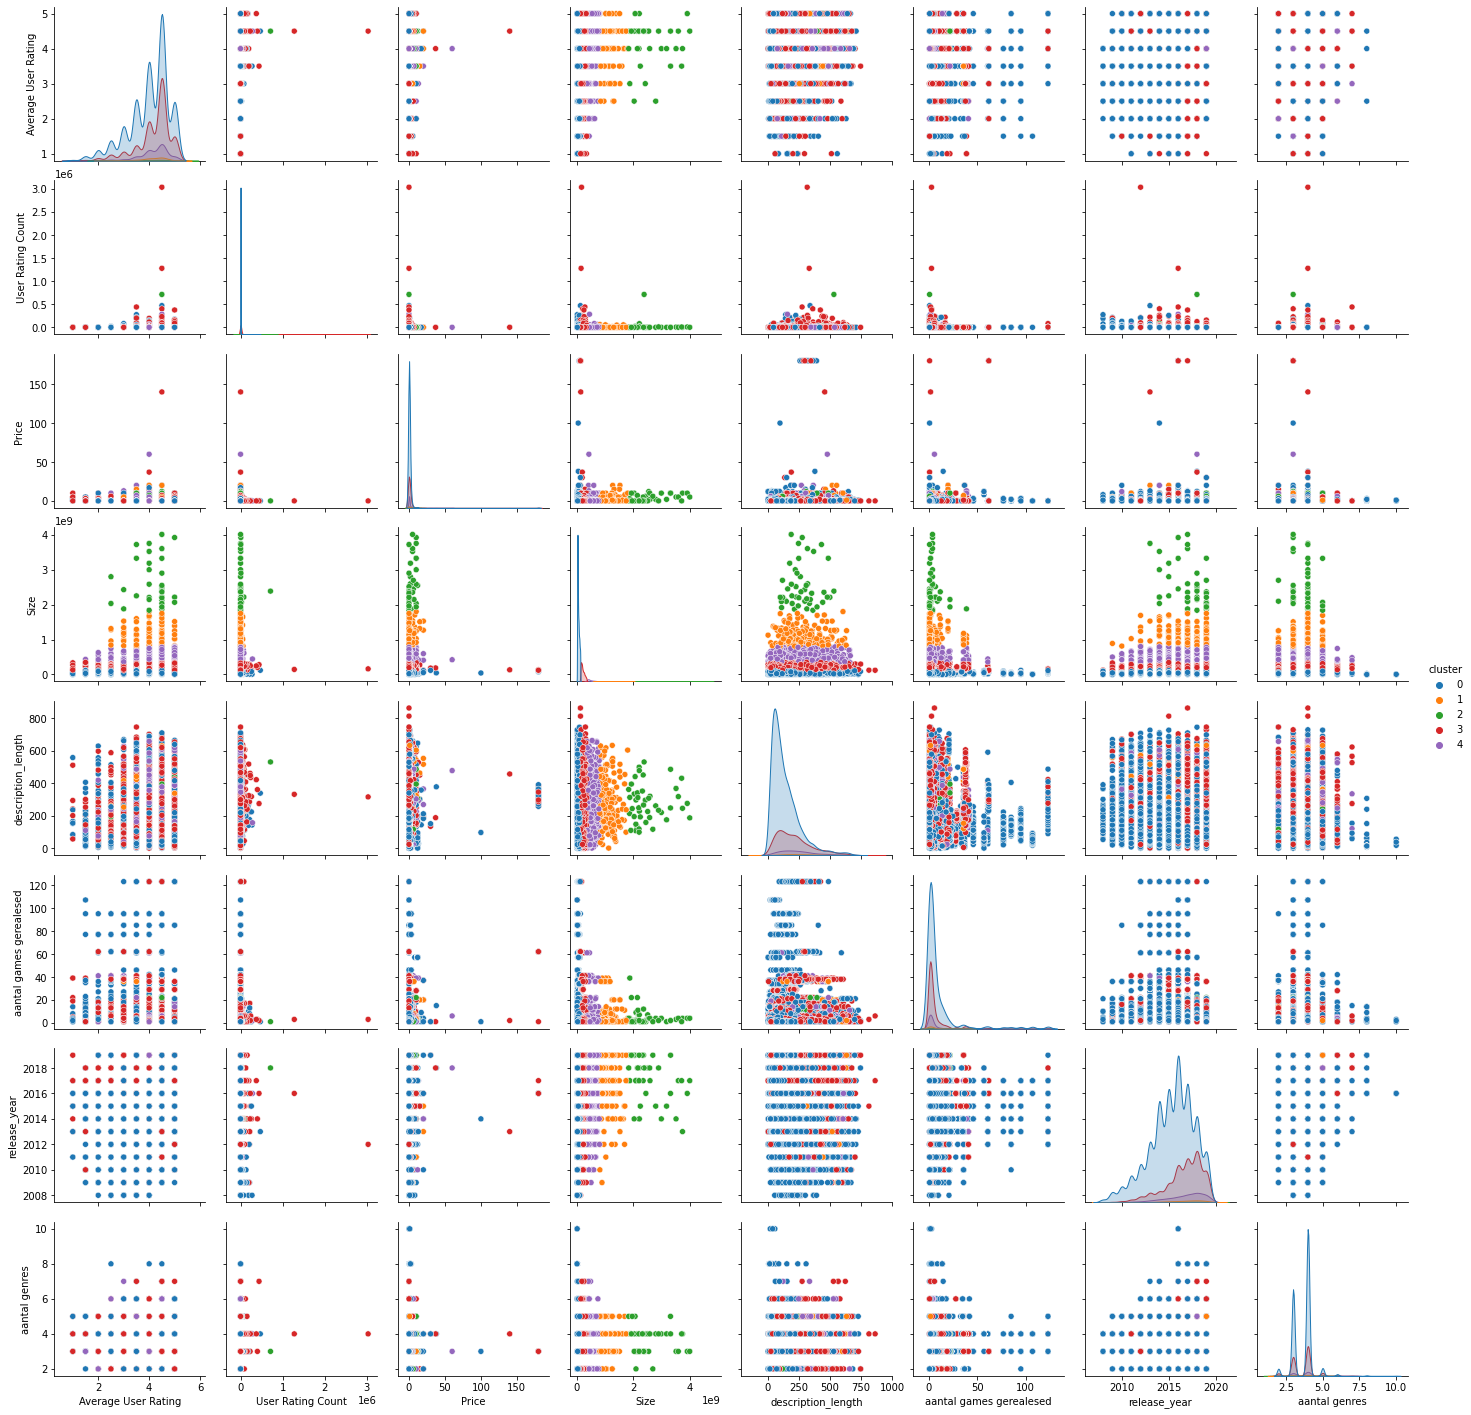

In [77]:
sns.pairplot(data=dataMetClusters,  kind='scatter', hue='cluster')

**harde lijnen in de size tabel**
dit komt doordat deze waardes een stuk grooter zijn.
tijd om de data te normaliseren

In [98]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_Normalised = dataMetClusters[['Size', 'User Rating Count', 'Price', 'Original Release Date', 'Current Version Release Date', 'aantal genres', 'Average User Rating', 'release_year', 'aantal games gerealesed', 'description_length']].copy()
# df_Normalised = df_Normalised - df_Normalised.min()
# df_Normalised = df_Normalised / df_Normalised.max()
df_Normalised = normalize(df_Normalised)
df_Normalised.describe().transpose()[['min', 'max']]

min  max
Size                          0.0  1.0
User Rating Count             0.0  1.0
Price                         0.0  1.0
Original Release Date         0.0  1.0
Current Version Release Date  0.0  1.0
aantal genres                 0.0  1.0
Average User Rating           0.0  1.0
release_year                  0.0  1.0
aantal games gerealesed       0.0  1.0
description_length            0.0  1.0

In [99]:
df_Normalised['hasRating'] = dataMetClusters['hasRating']
df_Normalised.dtypes

Size                             float64
User Rating Count                float64
Price                            float64
Original Release Date            float64
Current Version Release Date     float64
aantal genres                    float64
Average User Rating              float64
release_year                     float64
aantal games gerealesed          float64
description_length               float64
hasRating                       category
dtype: object

<AxesSubplot:>

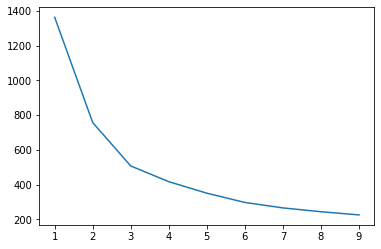

In [100]:
n_clusters_to_test = range(1,10)
inertias = []
for n in n_clusters_to_test:
    model = KMeans(n_clusters=n).fit(df_Normalised[columnsToPick])
    inertias.append(model.inertia_)

sns.lineplot(x=n_clusters_to_test, y=inertias)

In [104]:
ModelNormalised = KMeans(n_clusters=3)
fitModelNormal = Model.fit(df_Normalised[columnsToPick])
fitModel.labels_

array([2, 2, 0, ..., 0, 0, 0])

In [102]:
df_Normalised['cluster'] = fitModelNormal.labels_
df_Normalised['cluster'] = df_Normalised['cluster'].astype('category')
df_Normalised.dtypes

Size                             float64
User Rating Count                float64
Price                            float64
Original Release Date            float64
Current Version Release Date     float64
aantal genres                    float64
Average User Rating              float64
release_year                     float64
aantal games gerealesed          float64
description_length               float64
hasRating                       category
cluster                         category
dtype: object

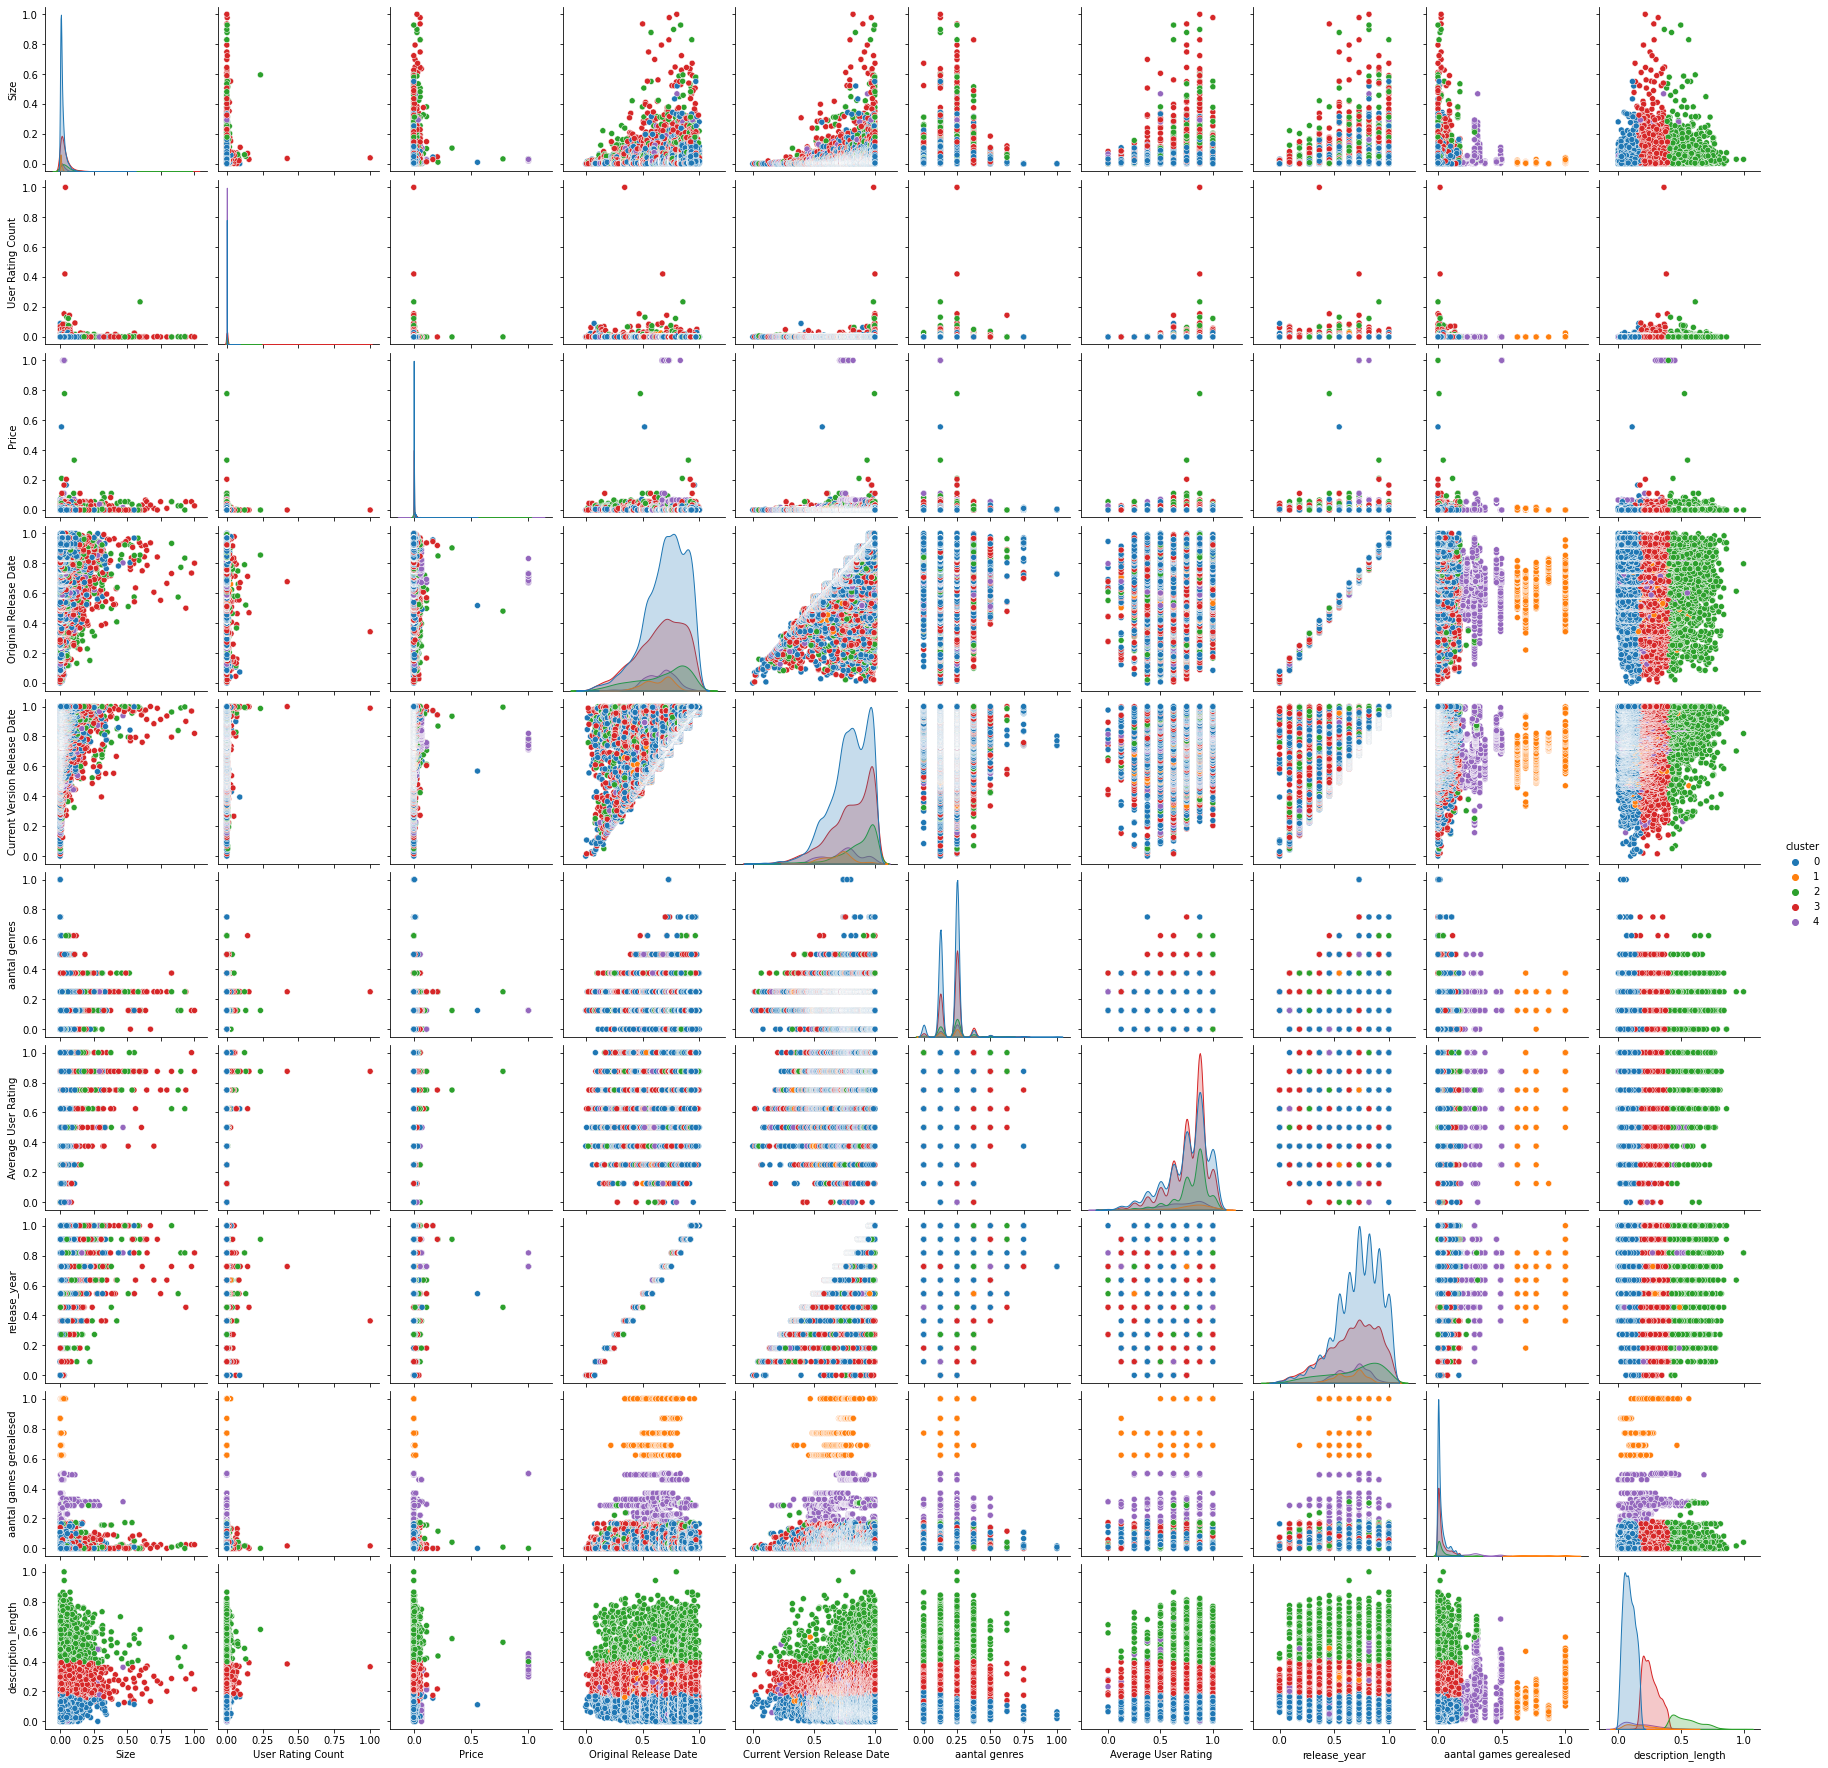

In [103]:
sns.pairplot(data=df_Normalised, hue='cluster')

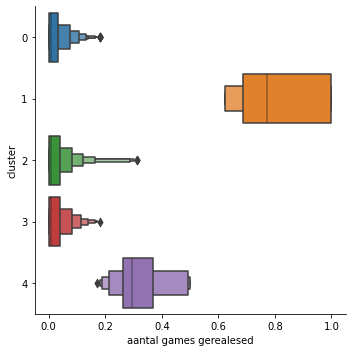

In [107]:
sns.catplot(x='aantal games gerealesed', y='cluster', data=df_Normalised, kind='boxen')

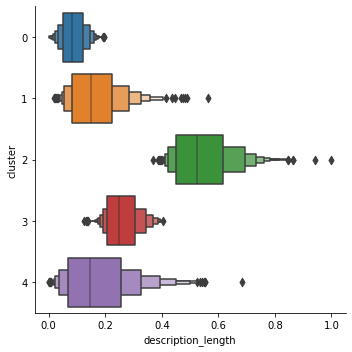

In [111]:
sns.catplot(x='description_length', y='cluster', data=df_Normalised, kind='boxen')

<AxesSubplot:xlabel='cluster', ylabel='aantal games gerealesed'>

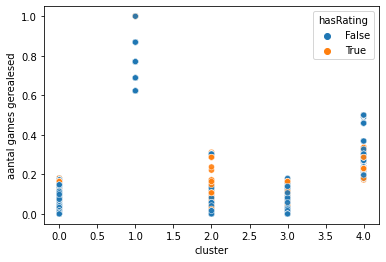

In [118]:
sns.scatterplot(data=df_Normalised, x='cluster', y='aantal games gerealesed', hue='hasRating', alpha=0.9)